In [1]:
import os
import random
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import tensorflow as tf
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import models
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D, Dropout
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications.vgg19 import VGG19

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_loc = '/content/drive/MyDrive/data1/TrainingData'
vel_loc = '/content/drive/MyDrive/data1/val'
test_loc = "/content/drive/MyDrive/data1/Testing"


In [4]:
model4 = Sequential()

# Convolutional layer 1
model4.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model4.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model4.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model4.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model4.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model4.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())

# Full connect layers

model4.add(Dense(units= 1024, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(units=1024, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(units=4, activation='softmax'))



model4.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [5]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train = generator_train.flow_from_directory('/content/drive/MyDrive/data1/TrainingData', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/content/drive/MyDrive/data1/val', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 4997 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.


In [6]:
history4 = model4.fit(train, steps_per_epoch=4997//32, epochs=20, validation_data=test, validation_steps= 1705//32)

Epoch 1/20
156/156 [==============================] - 824s 5s/step - loss: 0.7125 - categorical_accuracy: 0.7307 - val_loss: 1.4894 - val_categorical_accuracy: 0.3113
Epoch 2/20
156/156 [==============================] - 34s 219ms/step - loss: 0.4270 - categorical_accuracy: 0.8399 - val_loss: 2.0711 - val_categorical_accuracy: 0.2677
Epoch 3/20
156/156 [==============================] - 35s 222ms/step - loss: 0.3346 - categorical_accuracy: 0.8755 - val_loss: 1.0286 - val_categorical_accuracy: 0.5743
Epoch 4/20
156/156 [==============================] - 35s 221ms/step - loss: 0.2716 - categorical_accuracy: 0.8975 - val_loss: 0.4854 - val_categorical_accuracy: 0.8237
Epoch 5/20
156/156 [==============================] - 35s 222ms/step - loss: 0.2337 - categorical_accuracy: 0.9136 - val_loss: 0.5109 - val_categorical_accuracy: 0.8496
Epoch 6/20
156/156 [==============================] - 35s 222ms/step - loss: 0.1897 - categorical_accuracy: 0.9303 - val_loss: 0.3573 - val_categorical_accur

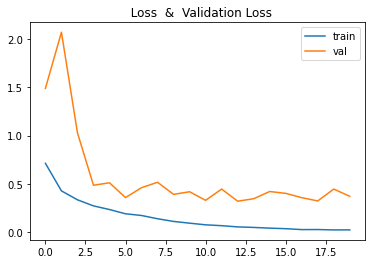

In [7]:
plt.plot(history4.history['loss'], label = 'train')
plt.plot(history4.history['val_loss'], label = 'val')
plt.title('  Loss  &  Validation Loss')
plt.legend()
plt.show()

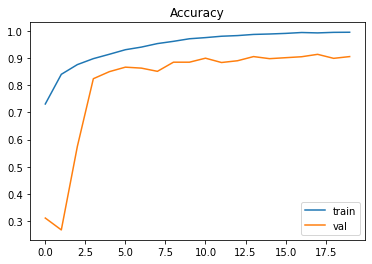

In [11]:
plt.plot(history4.history['categorical_accuracy'], label = 'train')
plt.plot(history4.history['val_categorical_accuracy'], label = 'val')
plt.title( "Accuracy"  )
plt.legend()
plt.show()